In [17]:
%matplotlib inline

In [30]:
from hydra import compose, initialize
from hydra.utils import instantiate
import matplotlib.pyplot as plt
import numpy as np
from bliss.catalog import TileCatalog

In [2]:
# load config using hydra

with initialize(config_path="../config", version_base=None):
    cfg = compose("config", overrides={})


In [82]:
ds = instantiate(cfg.datasets.simulated, batch_size = 256)

In [83]:
b = ds.get_batch()

In [85]:
images, _ = b.pop('images'), b.pop('background')
b = {k:v.cpu() for k,v in b.items()}
tile_cat = TileCatalog(4, b)
cat = tile_cat.to_full_params()

In [86]:
images = images.cpu().numpy()
images.shape

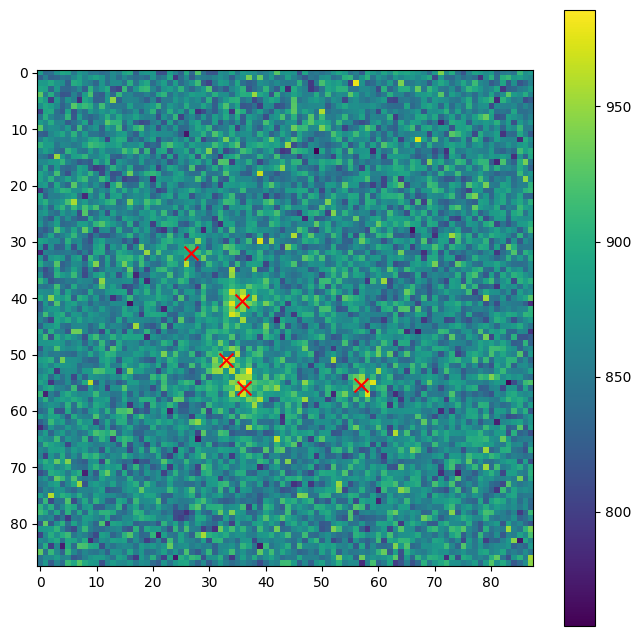

In [303]:
idx = np.random.randint(0, len(images))
im = images[idx, 0]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for ploc in cat.plocs[idx]:
    if ploc[0] > 0 and ploc[1] > 0:
        y, x = ploc + 24 - 0.5
        ax.scatter(x, y, marker='x', color='red', s=100)

# plt.imshow(np.log10(im), vmin=1, vmax=4)
pm = ax.imshow(im)
fig.colorbar(pm, ax=ax)


In [304]:
from bliss.models.galsim_decoder import _draw_pareto

In [309]:
x = _draw_pareto(0.47, 622, 1e6, 10000)
np.median(x), np.quantile(x, 0.75), np.quantile(x, 0.9)

(2539.9702, 9672.093505859375, 50762.95078125005)

9824.157470703125